# PCA and Horn's Parallel Analysis Lab

In this lab you'll practice using PCA on two datasets: heptathalon performance and the wine dataset that you have seen previously.

Horn's Parallel Analysis is a way to determine how many components you should keep after using a PCA on your data. Essentially it will tell you which of your components are likely noise which can be discarded.

---

### Load packages and heptathalon data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
hep = pd.read_csv('/Users/austinwhaley/Desktop/DSI-SF-4-austinmwhaley/datasets/heptathlon/heptathlon.csv')

In [3]:
hep.head()

,Unnamed: 0,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
1,John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
2,Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
3,Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
4,Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540


In [31]:
hep['hurdles'] = 110./hep['hurdles']
hep['run200m'] = 200./hep['run200m']
hep['run800m'] = 800./hep['run800m']

In [32]:
hep.head()

,Unnamed: 0,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),8.668243,1.86,15.80,8.865248,7.27,45.66,6.225196,7291
1,John (GDR),8.560311,1.80,16.23,8.456660,6.71,42.56,6.343165,6897
2,Behmer (GDR),8.333333,1.83,14.20,8.658009,6.68,44.54,6.441224,6858
3,Sablovskaite (URS),8.082292,1.80,15.23,8.361204,6.25,42.78,6.049607,6540
4,Choubenkova (URS),8.142117,1.74,14.76,8.357710,6.32,47.46,6.254887,6540


---

### Create dataframe excluding athlete and score

---

### Examine the correlation between the different events

Plot a heatmap if you want to get fancy. What does the correlation matrix tell you?

In [37]:
hep.iloc[:,1:].corr()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
hurdles,1.000000,0.779116,0.683805,0.802977,0.923797,0.043982,0.751634,0.934811
highjump,0.779116,1.000000,0.440786,0.473068,0.782442,0.002153,0.555286,0.767359
shot,0.683805,0.440786,1.000000,0.680184,0.743073,0.268989,0.447601,0.799699
run200m,0.802977,0.473068,0.680184,1.000000,0.814783,0.336934,0.633435,0.860900
longjump,0.923797,0.782442,0.743073,0.814783,1.000000,0.067108,0.697887,0.950437
javelin,0.043982,0.002153,0.268989,0.336934,0.067108,1.000000,0.025919,0.253147
run800m,0.751634,0.555286,0.447601,0.633435,0.697887,0.025919,1.000000,0.777813
score,0.934811,0.767359,0.799699,0.860900,0.950437,0.253147,0.777813,1.000000


In [38]:
events = hep.drop(['Unnamed: 0', 'score'], 1)

In [39]:
events.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
0,8.668243,1.86,15.80,8.865248,7.27,45.66,6.225196
1,8.560311,1.80,16.23,8.456660,6.71,42.56,6.343165
2,8.333333,1.83,14.20,8.658009,6.68,44.54,6.441224
3,8.082292,1.80,15.23,8.361204,6.25,42.78,6.049607
4,8.142117,1.74,14.76,8.357710,6.32,47.46,6.254887


---

### Standardize the data

In [40]:
from sklearn.preprocessing import StandardScaler

In [43]:
SS = StandardScaler()
Xn = pd.DataFrame(SS.fit_transform(events), columns=events.columns)
event_names = events.columns

In [44]:
Xn.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
0,1.806431,1.021376,1.835071,2.336591,2.405348,1.202526,0.987676
1,1.527957,0.235702,2.129240,1.045082,1.200091,0.310188,1.345538
2,0.942332,0.628539,0.740486,1.681527,1.135524,0.880133,1.643002
3,0.294621,0.235702,1.445125,0.743356,0.210059,0.373515,0.455019
4,0.448975,-0.549972,1.123591,0.732312,0.360716,1.720658,1.077742


---

### Fit a PCA on the standardized data using sklearn

In [27]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA()
pca.fit(Xn)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
pca.components_

array([[-0.4537067 , -0.36742524, -0.36917476, -0.41103609, -0.45596971,
        -0.08614954, -0.37226083],
       [-0.13505313, -0.27633985,  0.25347623,  0.24712711, -0.09221975,
         0.86114134, -0.17322253],
       [ 0.00846058,  0.41435647, -0.67952134, -0.09809294, -0.11066596,
         0.4308221 ,  0.39876187],
       [ 0.01388192,  0.65705272,  0.14288476, -0.3166502 ,  0.12238373,
         0.14596634, -0.6411877 ],
       [ 0.15563941, -0.06564944, -0.51893625,  0.64775707,  0.15926353,
        -0.11223419, -0.49459184],
       [ 0.8317523 , -0.12923811,  0.00570046, -0.16327155, -0.49834774,
         0.05774845, -0.11449967],
       [ 0.2441538 , -0.40523215, -0.21901407, -0.46242959,  0.69472805,
         0.16783506, -0.05959757]])

In [47]:
pc1_ev = pca.components_[0]
for weight, event in zip(pc1_ev, event_names):
    print weight, event

-0.453706704635 hurdles
-0.36742523852 highjump
-0.36917476409 shot
-0.41103609297 run200m
-0.455969710954 longjump
-0.0861495393229 javelin
-0.37226082747 run800m


In [48]:
pc1_ev = pca.components_[1]
for weight, event in zip(pc1_ev, event_names):
    print weight, event

-0.135053127902 hurdles
-0.276339849049 highjump
0.253476234859 shot
0.247127112846 run200m
-0.0922197539573 longjump
0.861141336217 javelin
-0.173222530198 run800m


---

### Create a DataFrame with the principal components

Add back in the athelete and score columns from the original data.

In [49]:
hep_pcs = pca.transform(Xn)
hep_pcs = pd.DataFrame(pca.components_, columns=['PC'+str(i) for i in range(len(event_names))])
hep_pcs['athlete'] = hep['Unnamed: 0']
hep_pcs['score'] = hep['score']
hep_pcs.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,athlete,score
0,-0.453707,-0.367425,-0.369175,-0.411036,-0.455970,-0.086150,-0.372261,Joyner-Kersee (USA),7291
1,-0.135053,-0.276340,0.253476,0.247127,-0.092220,0.861141,-0.173223,John (GDR),6897
2,0.008461,0.414356,-0.679521,-0.098093,-0.110666,0.430822,0.398762,Behmer (GDR),6858
3,0.013882,0.657053,0.142885,-0.316650,0.122384,0.145966,-0.641188,Sablovskaite (URS),6540
4,0.155639,-0.065649,-0.518936,0.647757,0.159264,-0.112234,-0.494592,Choubenkova (URS),6540


---

### Plot the variance explained (ratio) of your components

Explain what this chart tells you about your components.

In [51]:
exp_var = pca.explained_variance_ratio_
exp_var

array([ 0.63832499,  0.16512568,  0.07267193,  0.06981022,  0.03691008,
        0.01029863,  0.00685847])

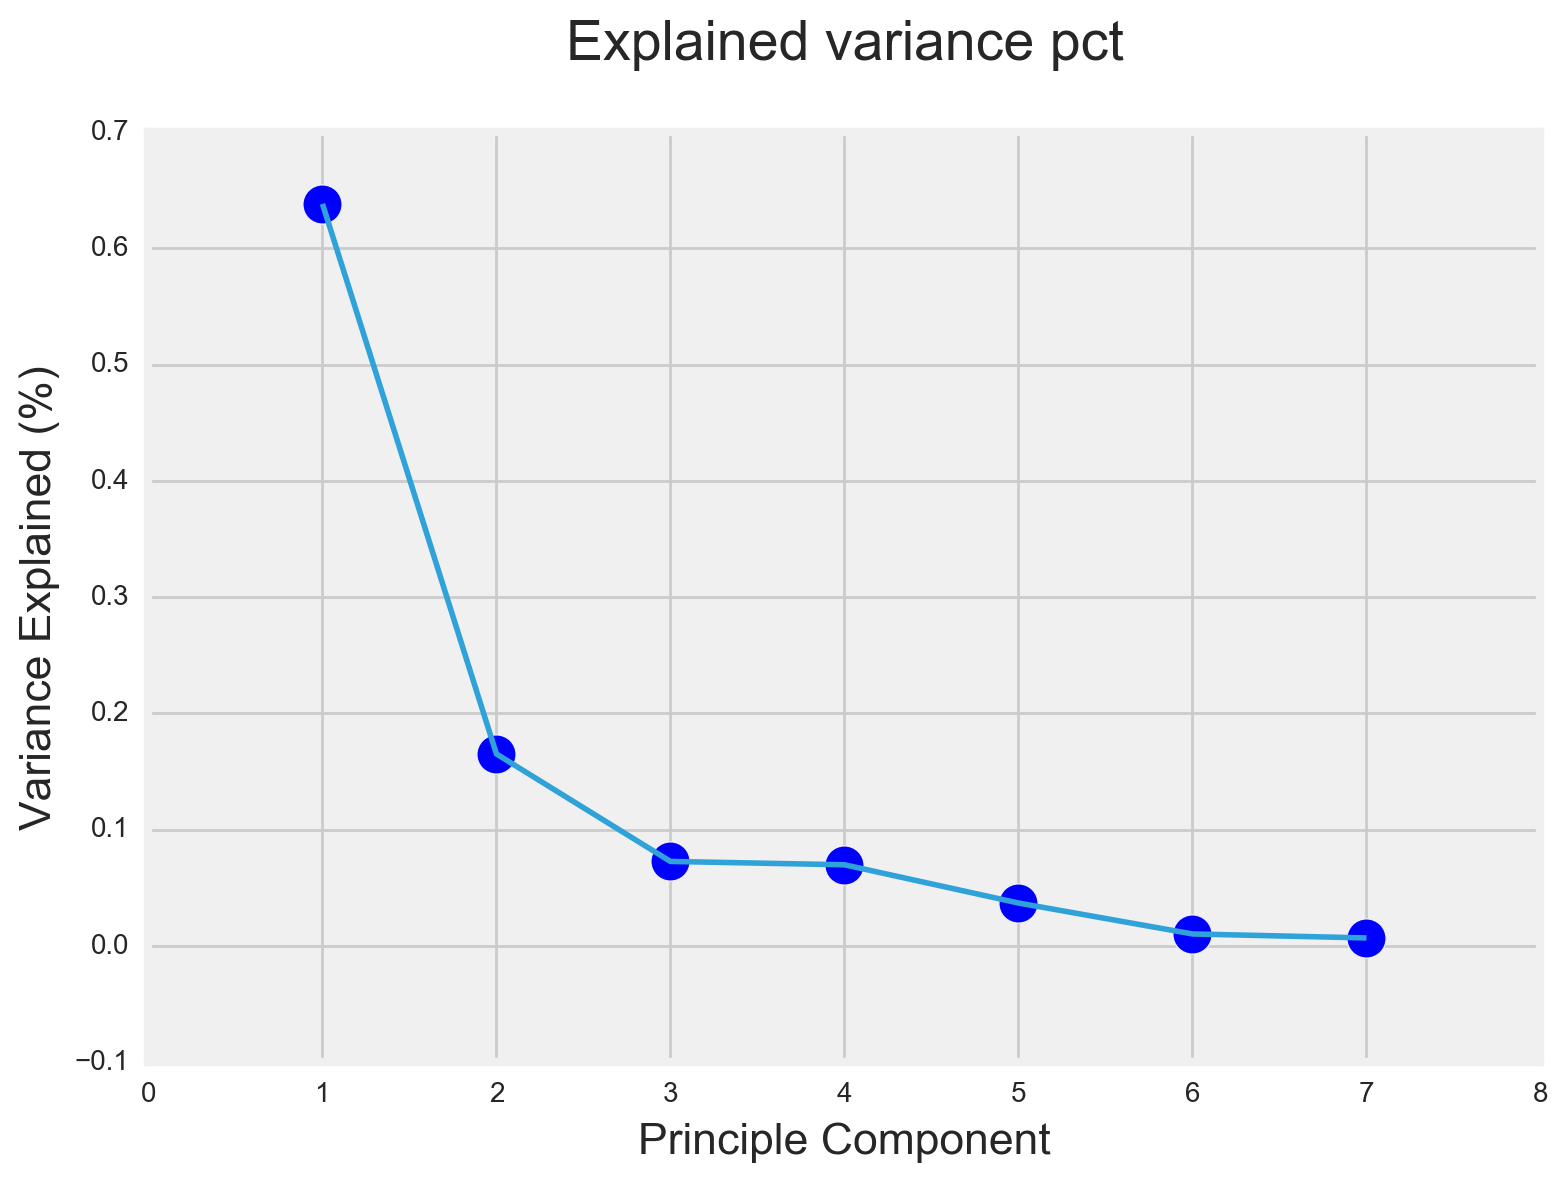

In [52]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, len(exp_var)+1), exp_var, lw=2)
ax.scatter(range(1, len(exp_var)+1), exp_var, s=200)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principle Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

---

### Print out the weights/eigenvectors (.components_ ) with their corresponding variables for PC1 and PC2

Based on how the original variables are weighted to calculate the components, how would you describe PC1 and PC2?

In [29]:
events_n_components = pca.components_

In [30]:
print events_n.columns, '\n'
print '-------------------------------------\n'

for i, pc in enumerate(['PC1','PC2','PC3','PC4','PC5', 'PC6', 'PC7']):
    print pc, 'weighting vector:', event_n_components[i]
    print '-------------------------------------\n'

Index([u'hurdles', u'highjump', u'shot', u'run200m', u'longjump', u'javelin',
       u'run800m'],
      dtype='object') 

-------------------------------------

PC1 weighting vector: [ 0.40001859 -0.35819903 -0.41849199  0.46477473 -0.41053548 -0.17170179
  0.35000943]
-------------------------------------

PC2 weighting vector: [ 0.17142039 -0.20157694  0.10957568 -0.11479637 -0.11892165  0.92342989
  0.19476046]
-------------------------------------

PC3 weighting vector: [-0.10759129  0.46349815 -0.72524483  0.13828779 -0.05390794  0.2958274
 -0.37157783]
-------------------------------------

PC4 weighting vector: [-0.02592548  0.64487187  0.25907412  0.47189867  0.10025049  0.07522117
  0.52721154]
-------------------------------------

PC5 weighting vector: [-0.06309342  0.09154077 -0.4244149  -0.61368564  0.17259414 -0.10377775
  0.62477426]
-------------------------------------

PC6 weighting vector: [-0.80337223 -0.10735107  0.03153473  0.03457204 -0.56396447  0.0221069
  0.14

---

### Plot PC1 vs. PC2. Which athletes are notable on each component?

---

### Plot PC1 vs. score and PC2 vs. score. What does this tell you about the relationship between the events and the score?

---

### Load the wine data

In [4]:
wine = pd.read_csv('/Users/kiefer/github-repos/DSI-SF-2/datasets/wine_quality/winequality_merged.csv')

---

### Subset the wine data to everything except the `red_wine` column

---

### Examine the correlation between variables

---

### Standardize the variables

---

### Fit a PCA on the standardized data

Create a new dataframe with the principal components and the `red_wine` column added back in from the original data.

---

### Plot the variance explained ratio of the components

---

### Print out the component weights with their corresponding variables for PC1, PC2, and PC3

How would you label the components based on the weights?

---

### Plot a seaborn pairplot of PC1, PC2, and PC3 with `hue='red_wine'`

Do any of the components differentiate red and white wine? If so, what does this tell you about the difference between red and white wine based on the component weights?

---

### Horn's parallel analysis

You can determine the appropriate number of components to keep by using a bootstrapping procedure known as Horn's Parallel Analysis. This is (as far as I know) the gold standard in determining which components aren't noise.

How to do the parallel analysis (pseudocode):

    for n iterations:
        create normally distributed random data the same shape as your data
        fit a PCA on the random data
        pull out the eigenvalues
    select a percentile of the eigenvalues as your threshold (0.5 = median, 0.95 = 95% confidence, etc.)
    plot the random component eigenvalues at that percentile against your data's pca eigenvalues
    components above the selected percentile are not noise, those under are
    
    
Write a function to perform the parallel analysis.

---

### Run parallel analysis for the wine data

---

### Plot the wine eigenvalues (`.variance_explained_`) against the parallel analysis random eigenvalue cutoffs

How many components are not noise, based on the chart?